First, I'll import the necessary packages 

    [pandas, statsmodels, and seaborn]
    
Then, we'll use a pandas method to read the csv as a DataFrame object

*A pandas DataFrame is almost exactly like an R data.frame()

In [46]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from seaborn import pairplot as pp

squid = pd.read_csv("~/CalamariDelight.csv")
squid.head()

,X1,X2,X3,X4,X5,Y,W1,W2,W3,W4,W5,Y0,Length,SST
0,1.31,1.07,0.44,0.75,0.35,1.95,-0.0973,-0.1330,-0.1371,-0.1028,-0.1665,-0.1528,1,215.92475
1,1.55,1.49,0.53,0.90,0.47,2.90,0.0495,0.1502,0.0104,0.0409,0.0086,-0.0881,1,215.92475
2,0.99,0.84,0.34,0.57,0.32,0.72,-0.2930,-0.2881,-0.3010,-0.2753,-0.2103,-0.2365,1,215.92475
3,0.99,0.83,0.34,0.54,0.27,0.81,-0.2930,-0.2948,-0.3010,-0.3040,-0.2833,-0.2304,1,215.92475
4,1.05,0.90,0.36,0.64,0.30,1.09,-0.2563,-0.2476,-0.2682,-0.2082,-0.2395,-0.2113,1,215.92475


Here, we'll slice our predictive variables by:

    "exogenous":X
        [Caused by forces outside of the model/independent]
        
    "endogenous":y
        [Caused by forces inside the model/dependent]

In [2]:
X = squid.loc[:,["X1","X2","X3","X4","X5"]]
y = squid.loc[:,["Y"]]

print(X,"\n",y)

      X1    X2    X3    X4    X5
0   1.31  1.07  0.44  0.75  0.35
1   1.55  1.49  0.53  0.90  0.47
2   0.99  0.84  0.34  0.57  0.32
3   0.99  0.83  0.34  0.54  0.27
4   1.05  0.90  0.36  0.64  0.30
5   1.09  0.93  0.42  0.61  0.31
6   1.08  0.90  0.40  0.51  0.31
7   1.27  1.08  0.44  0.77  0.34
8   0.99  0.85  0.36  0.56  0.29
9   1.34  1.13  0.45  0.77  0.37
10  1.30  1.10  0.45  0.76  0.38
11  1.33  1.10  0.48  0.77  0.38
12  1.86  1.47  0.60  1.01  0.65
13  1.58  1.34  0.52  0.95  0.50
14  1.97  1.59  0.67  1.20  0.59
15  1.80  1.56  0.66  1.02  0.59
16  1.75  1.58  0.63  1.09  0.59
17  1.72  1.43  0.64  1.02  0.63
18  1.68  1.57  0.72  0.96  0.68
19  1.75  1.59  0.68  1.08  0.62
20  2.19  1.86  0.75  1.24  0.72
21  1.73  1.67  0.64  1.14  0.55 
         Y
0    1.95
1    2.90
2    0.72
3    0.81
4    1.09
5    1.22
6    1.02
7    1.93
8    0.64
9    2.08
10   1.98
11   1.90
12   8.56
13   4.49
14   8.49
15   6.17
16   7.54
17   6.36
18   7.63
19   7.78
20  10.15
21   6.88


We'll add a "constant" column of all 1s to the squid DataFrame so that it's available to add to the model when/if we need it, checking again to make sure it worked.

Statsmodels will automatically add a constant term called 'Intercept' for ss (sum of squares) types that don't assume normalization/orthoganality. 

In [13]:
squid["const"] = 1

squid.head()

,X1,X2,X3,X4,X5,Y,W1,W2,W3,W4,W5,Y0,Length,SST,const
0,1.31,1.07,0.44,0.75,0.35,1.95,-0.0973,-0.1330,-0.1371,-0.1028,-0.1665,-0.1528,1,215.92475,1
1,1.55,1.49,0.53,0.90,0.47,2.90,0.0495,0.1502,0.0104,0.0409,0.0086,-0.0881,1,215.92475,1
2,0.99,0.84,0.34,0.57,0.32,0.72,-0.2930,-0.2881,-0.3010,-0.2753,-0.2103,-0.2365,1,215.92475,1
3,0.99,0.83,0.34,0.54,0.27,0.81,-0.2930,-0.2948,-0.3010,-0.3040,-0.2833,-0.2304,1,215.92475,1
4,1.05,0.90,0.36,0.64,0.30,1.09,-0.2563,-0.2476,-0.2682,-0.2082,-0.2395,-0.2113,1,215.92475,1


To fit the model, we'll well the "OLS" method of the statsmodels package, and fit it to our y and X slices.

After that, we'll call the "summary" method to show the results of our un-normalized regression.

In [24]:
model = ols('Y ~ X1+X2+X3+X4+X5',data=squid).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     84.07
Date:                Sun, 10 Oct 2021   Prob (F-statistic):           6.57e-11
Time:                        09:10:18   Log-Likelihood:                -19.975
No. Observations:                  22   AIC:                             51.95
Df Residuals:                      16   BIC:                             58.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5122      0.934     -6.976      0.000      -8.491      -4.533
X1             1.9994      2.573      0.777      0.449      -3.456       7.455
X2            -3.6751      2.774     -1.325      0.204      -9.555       2.205
X3             2.5245      6.347      0.398      0.696     -10.932      15.981
X4             5.1581      3.660      1.409      0.178      -2.601      12.918
X5            14.4012      4.856      2.966      0.009       4.107      24.695
==============================================================================
Omnibus:                        2.407   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.653
Skew:                          -0.465   Prob(JB):                        0.438
Kurtosis:                       2.030   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For (a), we want to write the original model without using scaled regressors.

To do that, let's round the numbers to make them look nicer.

We'll also make them strings to make writing the formula easier.

In [25]:
#get model parameters
params = model.params

#get names of regressors when not const
x_names = [x for x in params.index if x != "Intercept"]

constant = params["Intercept"]
constant = str(round(constant,2))

#round for aesthetics, string for equation
regressors = [str(round(params[x],2)) for x in x_names]

#uncomment to check values
#print(constant, regressors)

#beginning of equation string
model_eq = "y = " + constant

#loop through x_names and regressors, adding to equation string
for j,x in enumerate(x_names):
    model_eq += (" + " + regressors[j] + "*" + x)
    
print("Here's our model:\n\t",model_eq)

Here's our model:
	 y = -6.51 + 2.0*X1 + -3.68*X2 + 2.52*X3 + 5.16*X4 + 14.4*X5


(b)
An overfit model would be fitting itself more to noise than being predictive.
Rsq_a uses degrees of freedom to account for independent variables
than aren't pulling their weight.
To check for an overfit model, 
we're looking for an rsq_a that's significantly different than rsq.

*dif ≈ 0.011

At around a 1% different, I don't see that as strong evidence for overfitting.
To confirm, I might want to check the p-values for each regressor.

In [26]:
#(b)
rsq = model.rsquared
rsq_a = model.rsquared_adj
dif = round(rsq - rsq_a,3)
print(dif)

0.011


We'll run the regression again with the constant term so that it's available for all of the ss anovae.

In [39]:
#(c) with constant term
model = ols('Y ~ const+X1+X2+X3+X4+X5',data=squid).fit()
#model = ols('Y ~ X1+X2+X3+X4+X5',data=squid).fit()

#Getting the sequential ("type 1") sum of squares
table1 = sm.stats.anova_lm(model,typ=1)
seq_ss = table1.loc[:,"sum_sq"]

#I take the constant out of the model so that types 2 and 3 can do their thing
#model = ols('Y ~ const+X1+X2+X3+X4+X5',data=squid).fit()

#rerunning the model w/ different ss, saving results in tables
table2 = sm.stats.anova_lm(model,typ=2)
typ2_ss = table2.loc[:,"sum_sq"]
table3 = sm.stats.anova_lm(model,typ=3)
typ3_ss = table3.loc[:,"sum_sq"]

In [40]:
print(table1,"\n",table2,"\n",table3)

            df      sum_sq     mean_sq           F        PR(>F)
const      1.0    5.280026    5.280026   10.670057  4.849585e-03
X1         1.0  194.669993  194.669993  393.395767  1.087908e-12
X2         1.0    0.043664    0.043664    0.088238  7.702508e-01
X3         1.0    3.885425    3.885425    7.851799  1.278569e-02
X4         1.0    0.288709    0.288709    0.583433  4.560866e-01
X5         1.0    3.908228    3.908228    7.897880  1.257088e-02
Residual  16.0    7.917523    0.494845         NaN           NaN 
              sum_sq    df          F    PR(>F)
const     24.079175   1.0  48.660020  0.000003
X1         0.298731   1.0   0.603686  0.448510
X2         0.868761   1.0   1.755622  0.203784
X3         0.078273   1.0   0.158176  0.696097
X4         0.982690   1.0   1.985853  0.177914
X5         4.352193   1.0   8.795061  0.009109
Residual   7.917523  16.0        NaN       NaN 
               sum_sq    df          F    PR(>F)
Intercept  24.079175   1.0  48.660020  0.000003
cons

(c)

There are wide swings in the p and ss values between types 1 and 2/3, while 2 and 3 exhibit the same p values.

This indicates bias in 

In [45]:
#(c) without custom term
#model = ols('Y ~ const+X1+X2+X3+X4+X5',data=squid).fit()
model = ols('Y ~ X1+X2+X3+X4+X5',data=squid).fit()

#Getting the sequential ("type 1/2/3") sum of squares
table1 = sm.stats.anova_lm(model,typ=1)
seq_ss = table1.loc[:,"sum_sq"]

table2 = sm.stats.anova_lm(model,typ=2)
typ2_ss = table2.loc[:,"sum_sq"]

table3 = sm.stats.anova_lm(model,typ=3)
typ3_ss = table3.loc[:,"sum_sq"]

print("Sequential","\n",seq_ss,"\n","Type 2 Partial","\n",typ2_ss,"\n","Type 3 Partial","\n",typ3_ss)

Sequential 
 X1          199.145336
X2            0.126664
X3            4.119539
X4            0.263496
X5            4.352193
Residual      7.917523
Name: sum_sq, dtype: float64 
 Type 2 Partial 
 X1          0.298731
X2          0.868761
X3          0.078273
X4          0.982690
X5          4.352193
Residual    7.917523
Name: sum_sq, dtype: float64 
 Type 3 Partial 
 Intercept    24.079175
X1            0.298731
X2            0.868761
X3            0.078273
X4            0.982690
X5            4.352193
Residual      7.917523
Name: sum_sq, dtype: float64


(d)
Type 1 ss calculates variance based on the most "predictive" regressor.
Type 2 calculates partials based on assumed orthoganality, 
Type 3 calculates partials based on an assumed covariance.
If the regressors were mutually orthoganol, or exhibited less covariance, 
the sum of squares would be closer.

(e)
All of the pairs seem to be very correlated with each other, linearly, and with almost identical slopes all around.

This shows that there will likely be a significant difference in the sequential to partial sums of squares because of the assumed orthangonal nature in type 2 partial.

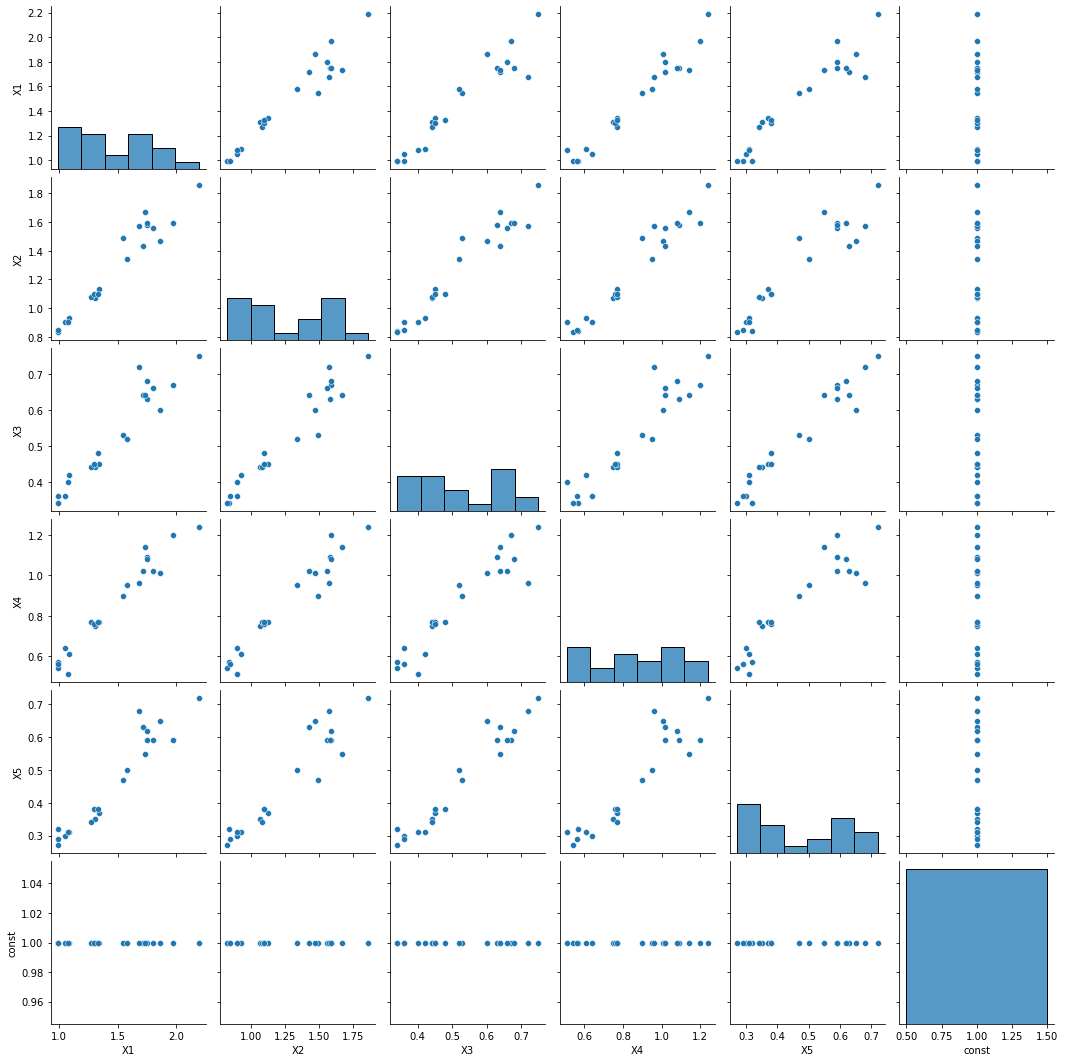

In [47]:
pp(X)

In [52]:
#Comparing model w/ X1,X2,X3 and without, always with X4,X5

model_null = ols('Y ~ X4+X5',data=squid).fit()
model_null.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     218.9
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           7.58e-14
Time:                        18:53:55   Log-Likelihood:                -21.359
No. Observations:                  22   AIC:                             48.72
Df Residuals:                      19   BIC:                             51.99
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3351      0.601    -10.543      0.000      -7.593      -5.077
X4             4.1542      1.710      2.429      0.025       0.574       7.734
X5            15.0160      2.606      5.763      0.000       9.562      20.470
==============================================================================
Omnibus:                        1.300   Durbin-Watson:                   2.347
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                0.947
Skew:                          -0.491   Prob(JB):                        0.623
Kurtosis:                       2.740   Cond. No.                         29.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
model_alt = ols('Y ~ X1+X2+X3+X4+X5',data=squid).fit()
model_alt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     84.07
Date:                Tue, 12 Oct 2021   Prob (F-statistic):           6.57e-11
Time:                        18:53:47   Log-Likelihood:                -19.975
No. Observations:                  22   AIC:                             51.95
Df Residuals:                      16   BIC:                             58.50
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.5122      0.934     -6.976      0.000      -8.491      -4.533
X1             1.9994      2.573      0.777      0.449      -3.456       7.455
X2            -3.6751      2.774     -1.325      0.204      -9.555       2.205
X3             2.5245      6.347      0.398      0.696     -10.932      15.981
X4             5.1581      3.660      1.409      0.178      -2.601      12.918
X5            14.4012      4.856      2.966      0.009       4.107      24.695
==============================================================================
Omnibus:                        2.407   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.300   Jarque-Bera (JB):                1.653
Skew:                          -0.465   Prob(JB):                        0.438
Kurtosis:                       2.030   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""